# SDFusion: Single-view Reconstruction (img2shape)

In [1]:
# first set up which gpu to use
import os
gpu_ids = 0
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_ids}"

In [2]:
# import libraries
import numpy as np
from PIL import Image
from IPython.display import Image as ipy_image
from IPython.display import display
from termcolor import colored, cprint

import torch
import torch.backends.cudnn as cudnn
cudnn.benchmark = True
import torchvision.utils as vutils

from models.base_model import create_model
from utils.util_3d import render_sdf, render_mesh, sdf_to_mesh, save_mesh_as_gif

%load_ext autoreload
%autoreload 2

/root/miniconda3/envs/pytorch_gpu/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# options for the model. please check `utils/demo_util.py` for more details
from utils.demo_util import SDFusionImage2ShapeOpt

seed = 2023
opt = SDFusionImage2ShapeOpt(gpu_ids=gpu_ids, seed=seed)
device = opt.device


[*] SDFusionImage2ShapeOption initialized.


In [5]:
# initialize SDFusion model

ckpt_path = 'saved_ckpt/model.pth'

opt.init_model_args(ckpt_path=ckpt_path)

SDFusion = create_model(opt)
cprint(f'[*] "{SDFusion.name()}" loaded.', 'cyan')

Working with z of shape (1, 3, 16, 16, 16) = 12288 dimensions.
[*] VQVAE: weight successfully load from: saved_ckpt/vqvae-snet-all.pth
[*] weight successfully load from: saved_ckpt/model.pth
[*] setting ddim_steps=100
[*] Model has been created: SDFusionImage2ShapeModel
[*] "SDFusionImage2ShapeModel" loaded.


## SDFusion: Single-view Reconstruction (img2shape)

TODO: add sample results here

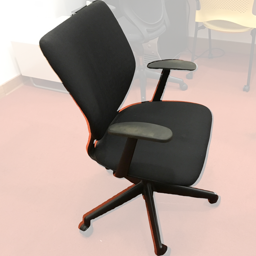

In [6]:
from utils.demo_util import preprocess_image
# img2shape
out_dir = 'demo_results'
if not os.path.exists(out_dir): os.makedirs(out_dir)

# input image. please use the grab_cut.ipynb to get the mask for your onw image
input_img = "demo_data/revolving-chair.jpg"
input_mask = "demo_data/revolving-chair-mask.png"

img, _ = preprocess_image(input_img, input_mask)

display(img)

Data shape for DDIM sampling is (1, 3, 16, 16, 16), eta 0.0
Running DDIM Sampling with 100 timesteps


DDIM Sampler: 100%|██████████| 100/100 [00:23<00:00,  4.25it/s]


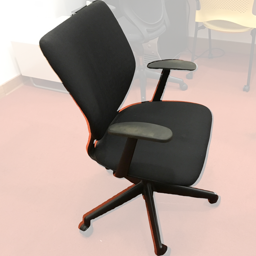

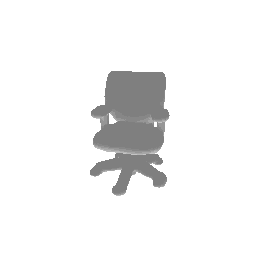

In [8]:
ngen = 1 # number of generated shapes
ddim_steps = 100
ddim_eta = 0.
uc_scale = 3.

sdf_gen = SDFusion.img2shape(image=input_img, mask=input_mask, ddim_steps=ddim_steps, ddim_eta=ddim_eta, uc_scale=uc_scale)

mesh_gen = sdf_to_mesh(sdf_gen)

# vis as gif
gen_name = f'{out_dir}/img2shape.gif'
save_mesh_as_gif(SDFusion.renderer, mesh_gen, nrow=3, out_name=gen_name)

display(img)
display(ipy_image(gen_name))